In [34]:
# Загружаем библиотеки
import numpy as np # работа с векторами
import matplotlib.pyplot as plt # рисовать графики
import pandas as pd # для работы с матрицами
import os as os #для смены директории
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge



In [35]:
fb = pd.read_csv('https://raw.githubusercontent.com/AVSirotkin/data_for_classes/master/dataset_Facebook.csv', sep = ';')
# переименуем
fb.columns = ['TotalLikes', 'Type', 'Category', 'Month', 'Weekday', 'Hour','Paid', 'Reach', 'Impressions','Engaged',
             'Consumers', 'Consumptions', 'ImpessionsLiked', 'ReachLiked', 'EngagedLiked', 'comment', 'like', 'share', 'total']
fb = fb.dropna()
len(fb)

495

Посмотрим количество лайков в зависимости от того, сколько человек вообще посмотрели этот пост

In [36]:
y = fb['like'].values
y = y.reshape(-1,1)

In [37]:
X = fb.iloc[:, 6:16]
#X = X.reshape(-1,1)

In [38]:
# Разделим данные на тренировочную и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, random_state = 4)

In [39]:
regFB = LinearRegression()
regFB.fit(X_train,y_train)
regFB.intercept_, regFB.coef_

(array([13.09449718]),
 array([[-2.58980564e+00, -7.60618542e-04,  1.95747564e-04,
          1.10696713e+00, -1.10026700e+00,  3.36084721e-03,
          2.28242094e-05,  4.82002607e-04,  1.38396951e-02,
          1.75334144e+00]]))

In [40]:
regR = Ridge(alpha = 0.01)
regR.fit(X_train,y_train)
regR.intercept_, regR.coef_

(array([13.0944176]),
 array([[-2.58945923e+00, -7.60618158e-04,  1.95747307e-04,
          1.10696711e+00, -1.10026700e+00,  3.36085092e-03,
          2.28247792e-05,  4.81999299e-04,  1.38397360e-02,
          1.75334122e+00]]))

Text(0, 0.5, 'Реальные значения')

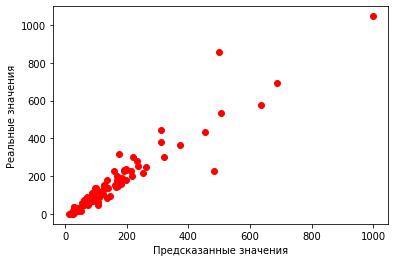

In [41]:
y_pred = regFB.predict(X_test)
plt.scatter(y_pred,y_test,color = 'red')
plt.xlabel('Предсказанные значения')
plt.ylabel("Реальные значения")

In [42]:
#MSE
mse = np.mean((y_pred - y_test)**2)
mse

3038.6272976633613

Text(0, 0.5, 'Реальные значения')

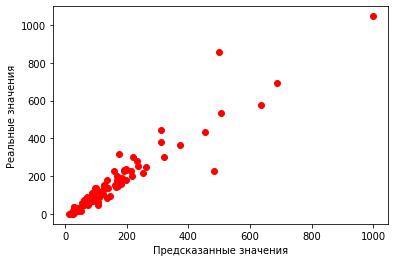

In [43]:
y_pred_l = regR.predict(X_test)
plt.scatter(y_pred_l,y_test,color = 'red')
plt.xlabel('Предсказанные значения')
plt.ylabel("Реальные значения")

In [44]:
mse = np.mean((y_pred_l - y_test)**2)
mse

3038.6261786844393

Ридж регрессия показала небольшой прирост качества по сравнению с простой регрессией.
Ваша задача:
1. Попробуйте изменить параметр alpha и посмотрите, на что он влияет.
2. Посмотрите справку по RidgeCV и попробуйте подобрать с ее помощью оптимальное значение alpha.

In [45]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import RidgeCV
skf = KFold(n_splits=5, shuffle=True, random_state=17)

c_values = np.logspace(-2, 3, 100)

logit_searcher = RidgeCV()
logit_searcher.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [46]:
logit_searcher.alpha_

10.0

In [32]:
c_values

array([1.00000000e-02, 1.12332403e-02, 1.26185688e-02, 1.41747416e-02,
       1.59228279e-02, 1.78864953e-02, 2.00923300e-02, 2.25701972e-02,
       2.53536449e-02, 2.84803587e-02, 3.19926714e-02, 3.59381366e-02,
       4.03701726e-02, 4.53487851e-02, 5.09413801e-02, 5.72236766e-02,
       6.42807312e-02, 7.22080902e-02, 8.11130831e-02, 9.11162756e-02,
       1.02353102e-01, 1.14975700e-01, 1.29154967e-01, 1.45082878e-01,
       1.62975083e-01, 1.83073828e-01, 2.05651231e-01, 2.31012970e-01,
       2.59502421e-01, 2.91505306e-01, 3.27454916e-01, 3.67837977e-01,
       4.13201240e-01, 4.64158883e-01, 5.21400829e-01, 5.85702082e-01,
       6.57933225e-01, 7.39072203e-01, 8.30217568e-01, 9.32603347e-01,
       1.04761575e+00, 1.17681195e+00, 1.32194115e+00, 1.48496826e+00,
       1.66810054e+00, 1.87381742e+00, 2.10490414e+00, 2.36448941e+00,
       2.65608778e+00, 2.98364724e+00, 3.35160265e+00, 3.76493581e+00,
       4.22924287e+00, 4.75081016e+00, 5.33669923e+00, 5.99484250e+00,
      